# RANODOM_FOREST

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                1470 non-null   int64  
 1   BusinessTravel           1470 non-null   int64  
 2   DailyRate                1470 non-null   int64  
 3   Department               1470 non-null   int64  
 4   DistanceFromHome         1470 non-null   int64  
 5   EducationField           1470 non-null   float64
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobInvolvement           1470 non-null   int64  
 8   JobLevel                 1470 non-null   int64  
 9   JobRole                  1470 non-null   int64  
 10  JobSatisfaction          1470 non-null   int64  
 11  MaritalStatus            1470 non-null   int64  
 12  MonthlyIncome            1470 non-null   float64
 13  OverTime                 1470 non-null   int64  
 14  StockOptionLevel        

In [5]:
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

# standard scaling

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
params = {'n_estimators':[20,40,60,80,100],
          'max_features':['sqrt',0.25,0.50,0.75,1],
          'min_samples_split':[2,4,6]}

In [11]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf,params,cv = 10,random_state = 8)
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5,
                                                         0.75, 1],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=8)

In [12]:
search.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=40)

In [13]:
rf2 = search.best_estimator_
model_rf = rf2.fit(x_train,y_train)

In [14]:
y_pred = model_rf.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [16]:
accuracy_score(y_pred,y_test)

0.8639455782312925

In [17]:
print(confusion_matrix(y_pred,y_test))

[[250  35]
 [  5   4]]


In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       285
           1       0.10      0.44      0.17         9

    accuracy                           0.86       294
   macro avg       0.54      0.66      0.55       294
weighted avg       0.95      0.86      0.90       294



In [19]:
roc_auc_score(y_pred,y_test)

0.6608187134502924

In [20]:
y_pred_prob = model_rf.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.762292609351433

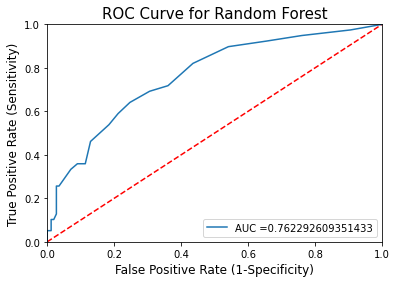

In [21]:
plt.title('ROC Curve for Random Forest',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()